# Private School Fee Analysis in Nepal

#### Project Description
This project involves a comprehensive quantitative analysis of private school fees across Nepal using simulated data. A dataset of 5,000 records is generated, containing features such as tuition fees, school level, location, admission fees, and student-teacher ratios. To provide hands-on experience with data preparation, the dataset includes various data wrangling issues such as missing values, text in numeric columns, duplicates, formatting inconsistencies, and outliers.

The project focuses first on data cleaning using techniques like type conversion, imputation, outlier detection, and string normalization. After cleaning, exploratory data analysis (EDA) is conducted to uncover trends and disparities in school fees across regions and levels.

Furthermore, machine learning models are applied to predict school fees and classify schools based on quantitative features. Algorithms such as linear regression, decision trees, and clustering are explored to extract patterns and make data-driven insights. This end-to-end project strengthens skills in data cleaning, EDA, and ML modeling—providing practical experience relevant to real-world educational and policy analysis.


#### 1. Data Cleaning

##### a. Load Data

In [2]:
import pandas as pd

# loading a DataFrame
df = pd.read_csv('Anupama_Wrangled_School_Fee_Dataset.csv')
# Give the information on datasets

print("Missing values per column:\n", df.isnull().sum())
# Checks  if there are any null values in the dataset in each columns

# Result:  Admission Fee (NPR) and Technology Access Index

Missing values per column:
 Annual Tuition Fee (NPR)        0
Admission Fee (NPR)           253
Monthly Fee (NPR)               0
Infrastructure Score            0
Student-Teacher Ratio           0
Average Academic Score (%)      0
Total Enrolled Students         0
Scholarship % Availability      0
Technology Access Index       253
Fee Increase % (YoY)            0
dtype: int64


##### b. Clean Data

##### Wrangling Issues
- Missing values :  Admission Fee, Technology Access Index
- Wrong data types : 'four thousand' in Monthly Fee (NPR)
- Formatting issues : Extra spaces in Student-Teacher Ratio
- Duplicate rows : 30 exact duplicates added
- Outliers : Some Annual Tuition Fee values multiplied by 10

##### Step 1: Fixing missing values (null) with median and mean values

In [3]:
# Calculate the mean values (ignoring NaNs)
admission_fee_mean = df['Admission Fee (NPR)'].median()
tech_access_mean = df['Technology Access Index'].mean()

# Fill missing values with the mean
df['Admission Fee (NPR)'] = df['Admission Fee (NPR)'].fillna(admission_fee_mean)
df['Technology Access Index'] = df['Technology Access Index'].fillna(tech_access_mean)

# Check missing values again to confirm
print(df.isnull().sum())
# Result: no null values 

Annual Tuition Fee (NPR)      0
Admission Fee (NPR)           0
Monthly Fee (NPR)             0
Infrastructure Score          0
Student-Teacher Ratio         0
Average Academic Score (%)    0
Total Enrolled Students       0
Scholarship % Availability    0
Technology Access Index       0
Fee Increase % (YoY)          0
dtype: int64


#####  Step 2. Fixing wrong data types in  'four thousand' in Monthly Fee (NPR)

In [4]:
import pandas as pd
from word2number import w2n

# Sample DataFrame
# df = pd.DataFrame({'Monthly Fee (NPR)': ['two thousand', '1500', 'five hundred', '3000', 'one thousand five hundred']})

def convert_to_number(value):
    try:
        return w2n.word_to_num(value)
    except:
        try:
            return float(value)  # Try converting directly if it's already a number
        except:
            return None  # Set invalid entries to None/NaN

df['Monthly Fee (NPR)'] = df['Monthly Fee (NPR)'].astype(str).apply(convert_to_number)

##### Step 3. Fixing Formatting issues i.e. Extra spaces in Student-Teacher Ratio

In [5]:
# Step 1: Convert to string and strip spaces
df['Student-Teacher Ratio'] = df['Student-Teacher Ratio'].astype(str).str.strip()

# Step 2: Convert to numeric, replacing invalid entries with NaN
df['Student-Teacher Ratio'] = pd.to_numeric(df['Student-Teacher Ratio'], errors='coerce')

# Step 3: Fill NaNs with the column mean (optional, if needed)
ratio_mean = df['Student-Teacher Ratio'].mean()
df['Student-Teacher Ratio'] = df['Student-Teacher Ratio'].fillna(ratio_mean)

# Optional: Check for any missing or incorrectly formatted values
print("Remaining NaNs in Student-Teacher Ratio:", df['Student-Teacher Ratio'].isnull().sum())

# Result: Remaining NaNs in Student-Teacher Ratio: 0

Remaining NaNs in Student-Teacher Ratio: 0


##### Step 4. Find and Removing the duplicate rows  (30 exact duplicates added)

In [6]:
# Step 1. Find and display duplicates
duplicates = df[df.duplicated()]
print(duplicates)
print("Total duplicate rows:", len(duplicates))
# Result : shows all the duplicate values of rows

      Annual Tuition Fee (NPR)  Admission Fee (NPR)  Monthly Fee (NPR)  \
5000                     46267              12507.0               3564   
5001                     49093              10539.0               3890   
5002                     23221               3797.0               3770   
5003                     50553               9955.0               4586   
5004                     64424              14021.0               5209   
5005                     68053              11590.0               5197   
5006                     70591               9955.0               4304   
5007                     57508               9157.0               2746   
5008                     60450               7464.0               4278   
5009                     58146              13442.0               5789   
5010                     47616              11707.0               4076   
5011                     53469               6571.0               4000   
5012                     52408        

In [7]:
# Step 2: Count number of duplicates
print("Number of duplicate rows:", duplicates.shape[0])

# Step 3: Remove duplicates
df = df.drop_duplicates()
 
#Result: Number of duplicate rows: 30

Number of duplicate rows: 30


In [8]:
# Find and display duplicates
duplicates = df[df.duplicated()]
print("Total duplicate rows:", len(duplicates))
# Result: Total duplicate rows: 0

Total duplicate rows: 0


##### Step 5. Finding and Fixing outlier in Annual Tution Fee

In [9]:
# Step 1: Calculate IQR
Q1 = df['Annual Tuition Fee (NPR)'].quantile(0.25)
Q3 = df['Annual Tuition Fee (NPR)'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Find outliers
outliers = df[(df['Annual Tuition Fee (NPR)'] < lower_bound) | 
              (df['Annual Tuition Fee (NPR)'] > upper_bound)]
print("Outliers detected:", len(outliers))

# Result: Outliers detected: 50

Outliers detected: 50


In [10]:
# Cap outliers : Filling the correct values instead of outliers
df['Annual Tuition Fee (NPR)'] = df['Annual Tuition Fee (NPR)'].clip(lower=lower_bound, upper=upper_bound)

##### c. Write new File

In [11]:
# 4. Save the updated DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

#### 2. Scientific analysis using Scipy

Use Case 1: Summary Statistics (Mean, Median and Mode)
-Annual Tuition Fee, Monthly Fee, and Student-Teacher Ratio.


In [12]:
from scipy import stats

mean_fee = df['Annual Tuition Fee (NPR)'].mean()
median_fee = df['Annual Tuition Fee (NPR)'].median()
mode_fee = stats.mode(df['Annual Tuition Fee (NPR)'], keepdims=True)
print(f'Mean: {mean_fee} \nMedian: {median_fee} \nMode: {mode_fee[0]}')
#Result:
# Mean: 50488.82615 
# Median: 50374.5 
# Mode: [84631.875]


Mean: 50488.82615 
Median: 50374.5 
Mode: [84631.875]


In [13]:
mean_fee = df['Monthly Fee (NPR)'].mean()
median_fee = df['Monthly Fee (NPR)'].median()
mode_fee = stats.mode(df['Monthly Fee (NPR)'], keepdims=True)
print(f'Mean: {mean_fee} \nMedian: {median_fee} \nMode: {mode_fee[0]}')
# Result:
# Mean: 4001.553 
# Median: 4000.0 
# Mode: [4000]


Mean: 4001.553 
Median: 4000.0 
Mode: [4000]


In [14]:
mean_fee = df['Student-Teacher Ratio'].mean()
median_fee = df['Student-Teacher Ratio'].median()
mode_fee = stats.mode(df['Student-Teacher Ratio'], keepdims=True)
print(f'Mean: {mean_fee} \nMedian: {median_fee} \nMode: {mode_fee[0]}')
# Result:
# Mean: 24.924413847624603 
# Median: 24.832648281314885 
# Mode: [10.]


Mean: 24.924413847624603 
Median: 24.832648281314885 
Mode: [10.]


Use Case 2: Z-Test (One Sample)
- Check if the average monthly fee significantly differs from a known standard (e.g., NPR 4000 (Median)).

In [15]:
from scipy.stats import zscore
import numpy as np
sample_mean=df['Monthly Fee (NPR)'].mean()
population_mean=4000
SD=df['Monthly Fee (NPR)'].std()
n=len(df['Monthly Fee (NPR)'])

z = (sample_mean - population_mean) / (SD / np.sqrt(n))
print(f"Z-score: {z:.2f}")

z_critical = 1.96   # z_critical means table value
if abs(z) > z_critical:
    print("There is a significant difference. Reject Null Hypothesis")
else:
    print("No significant difference.")

#Result : Z-score: 0.11
# No significant difference.

Z-score: 0.11
No significant difference.


Use Case 3: T-Test (Independent Samples)
- Are schools with high scholarship availability charging significantly different tuition than those with low scholarship availability?      compare between subsets
-  Interpretation:
- If p_val < 0.05 → Reject the null hypothesis → Significant difference in tuition fees between the two groups.
- If p_val ≥ 0.05 → Fail to reject the null hypothesis → No significant difference detected.

In [16]:
from scipy.stats import ttest_ind

high_scholar = df[df['Scholarship % Availability'] >= 20]['Annual Tuition Fee (NPR)']
low_scholar = df[df['Scholarship % Availability'] < 20]['Annual Tuition Fee (NPR)']

t_stat, p_val = ttest_ind(high_scholar, low_scholar, nan_policy='omit')
print(f't-value:{t_stat},p-value: {p_val}')
if p_val< 0.05:
    print('Reject null hypothesis. There is significant difference between tution fee.')
else:
    print('There is no significant difference')

#Result: 
# t-value:0.1140332943788666,p-value: 0.9092159807618077
# There is no significant difference

t-value:0.1140332943788666,p-value: 0.9092159807618077
There is no significant difference


Use Case 4:  Chi-Square Test (on Binned Fee Categories) : degree of goodness
- Check if fee groups (Low, Mid, High) are associated with access to technology levels (Low, Mid, High).


In [17]:
# Binning fees and tech index
import pandas as pd
from scipy.stats import chi2_contingency
fee_group = pd.qcut(df['Annual Tuition Fee (NPR)'], q=3, labels=['Low', 'Mid', 'High'])
tech_group = pd.qcut(df['Technology Access Index'], q=3, labels=['Low', 'Mid', 'High'])

contingency = pd.crosstab(fee_group, tech_group)
chi2, p, dof, expected = chi2_contingency(contingency)

print("Contingency Table (Fees × Tech Index):")
print(contingency, "\n")
# Result: 
# Contingency Table (Fees × Tech Index):
# Technology Access Index   Low  Mid  High
# Annual Tuition Fee (NPR)                
# Low                       559  547   561
# Mid                       559  562   545
# High                      549  557   561


Contingency Table (Fees × Tech Index):
Technology Access Index   Low  Mid  High
Annual Tuition Fee (NPR)                
Low                       559  547   561
Mid                       559  562   545
High                      549  557   561 



In [18]:
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrees of freedom: {dof}\n")

print("Expected Frequencies (under H₀):")
print(pd.DataFrame(expected, 
                   index=['Low Fee','Mid Fee','High Fee'], 
                   columns=['Low Tech','Mid Tech','High Tech']))

if p_val< 0.05:
    print('Reject null hypothesis. fee groups (Low, Mid, High) are not associated with access to technology levels (Low, Mid, High).')
else:
    print('There is no significant difference. So fee groups (Low, Mid, High) are associated with access to technology levels (Low, Mid, High)')

# Result:
# Chi-square statistic: 0.6369
# p-value: 0.9589
# Degrees of freedom: 4

# Expected Frequencies (under H₀):
#           Low Tech  Mid Tech  High Tech
# Low Fee   555.7778  555.4444   555.7778
# Mid Fee   555.4444  555.1112   555.4444
# High Fee  555.7778  555.4444   555.7778
# There is no significant difference. So fee groups (Low, Mid, High) are associated with access to technology levels (Low, Mid, High)

Chi-square statistic: 0.637
p-value: 0.959
Degrees of freedom: 4

Expected Frequencies (under H₀):
          Low Tech  Mid Tech  High Tech
Low Fee   555.7778  555.4444   555.7778
Mid Fee   555.4444  555.1112   555.4444
High Fee  555.7778  555.4444   555.7778
There is no significant difference. So fee groups (Low, Mid, High) are associated with access to technology levels (Low, Mid, High)


Use Case 5: Correlation (Pearson & Spearman)
1. Is there a linear relationship between Annual Tuition Fee (NPR) and Infrastructure Score?
2. Do Student-Teacher Ratio and Average Academic Score (%) move together?

1. Is there a linear relationship between Annual Tuition Fee (NPR) and Infrastructure Score?

In [19]:
from scipy.stats import pearsonr
pearsonr_corr, p_val=pearsonr(df['Annual Tuition Fee (NPR)'], df['Infrastructure Score'])
print('Pearson Correlation: Annual Tution Fee vs Infrastructure Score')
print(f'Correlation Coefficient (r): {pearsonr_corr:.4f}')
print(f'p_val: {p_val:.4f}')

# Interpretation
if p_val< 0.05:
    print('There is a statistically significant linear relationship')
else:
    print('There is no statistically significant linear relationship.')

# Result:
# Pearson Correlation: Annual Tution Fee vs Infrastructure Score
# Correlation Coefficient (r): -0.0115
# p_val: 0.4160
# There is no statistically significant linear relationship.

Pearson Correlation: Annual Tution Fee vs Infrastructure Score
Correlation Coefficient (r): -0.0115
p_val: 0.4160
There is no statistically significant linear relationship.


2. Do Student-Teacher Ratio and Average Academic Score (%) move together?

In [20]:
from scipy.stats import spearmanr
spearmanr_corr, p_val= spearmanr(df['Student-Teacher Ratio'], df['Average Academic Score (%)'])
# Output Result
print('Spearman Correlation: Student-Teacher Ratio Vs Average Academic Average Score')
print(f'Correlation coefficient (ρ): {spearmanr_corr:.4f}')
print(f'p-value: {p_val:.4f}')
#Interpretation
if p_val<0.005:
    print('There is statistically significant monotonic relationship.')
else:
    print('There is no statistically significant monotonic relationship.')

# Result:
# Spearman Correlation: Student-Teacher Ratio Vs Average Academic Average Score
# Correlation coefficient (ρ): 0.0046
# p-value: 0.7476
# There is no statistically significant monotonic relationship.

Spearman Correlation: Student-Teacher Ratio Vs Average Academic Average Score
Correlation coefficient (ρ): 0.0046
p-value: 0.7476
There is no statistically significant monotonic relationship.


Usse Case 6: Shapiro-Wilk Test (Normality Test)   :normalization test/ how optimal are they
- Test if Average Academic Score follows a normal distribution.
- p > 0.05: Likely normal
- p <= 0.05: Not normally distributed 

In [21]:
from scipy.stats import shapiro

stat, p = shapiro(df['Average Academic Score (%)'].sample(500, random_state=1))
if p> 0.05:
    print('It is normally distributed.')
else:
    print('It is not normally distributed.')

# Result: It is normally distributed.


It is normally distributed.


#### 3. Data Visualization (Plotting, Charting, Seaborn)
Visualization Lab: School Fee Analysis in Nepal (Private Schools)
This lab demonstrates 10 different visualization use cases based on the cleaned, quantitative dataset of private schools in Nepal. Each section includes the use case, its purpose, and the full Python code using matplotlib and seaborn.


1. Distribution of Annual Tuition Fee (Histogram)
Purpose: To understand how tuition fees are spread across schools and whether the distribution is normal, skewed, or multi-modal.


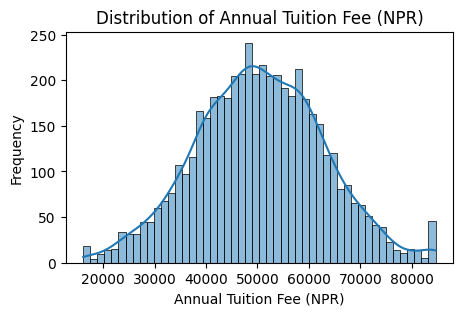

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data.csv') 

plt.figure(figsize=(5,3))
sns.histplot(df['Annual Tuition Fee (NPR)'], bins=50, kde=True)
plt.title('Distribution of Annual Tuition Fee (NPR)')
plt.xlabel('Annual Tuition Fee (NPR)')
plt.ylabel('Frequency')
plt.show()


2. Boxplot of Monthly Fees to Detect Outliers
Purpose: To detect outliers and visualize spread, median, and quartiles of monthly fees.


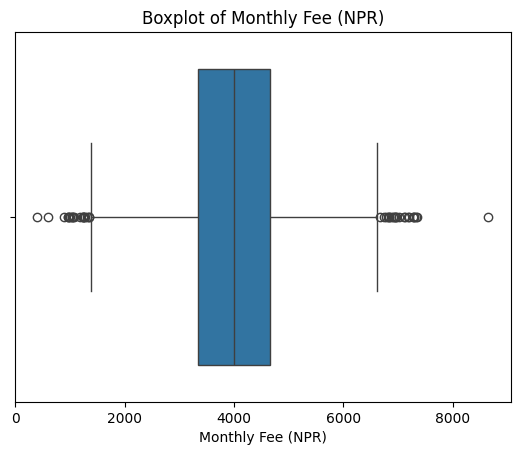

In [23]:
plt.figure()
sns.boxplot(x=df['Monthly Fee (NPR)'])
plt.title('Boxplot of Monthly Fee (NPR)')
plt.xlabel('Monthly Fee (NPR)')
plt.show()

3. Scatter Plot: Infrastructure Score vs Tuition Fee
Purpose: To see if schools with better infrastructure tend to charge higher tuition fees.


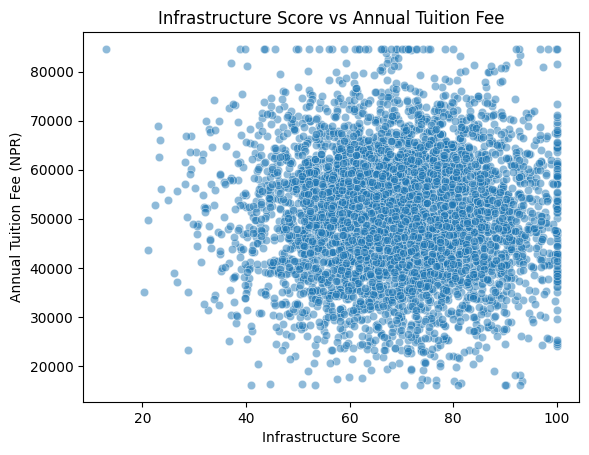

In [24]:
sns.scatterplot(x='Infrastructure Score', y='Annual Tuition Fee (NPR)', data=df, alpha=0.5)
plt.title('Infrastructure Score vs Annual Tuition Fee')
plt.xlabel('Infrastructure Score')
plt.ylabel('Annual Tuition Fee (NPR)')
plt.show()


4. Correlation Heatmap of All Quantitative Features
Purpose: To identify which variables are positively or negatively correlated.


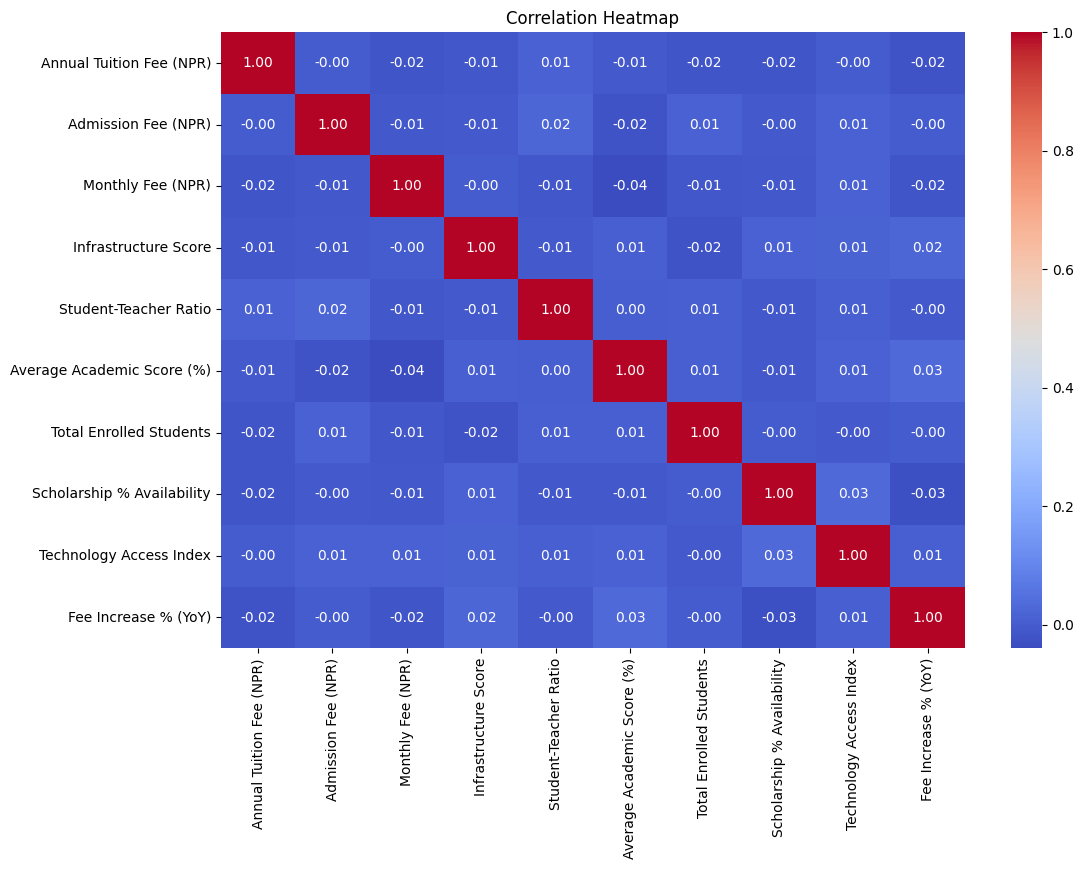

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

5. Pairplot of Selected Key Features
Purpose: To explore pairwise relationships and distributions between multiple variables.


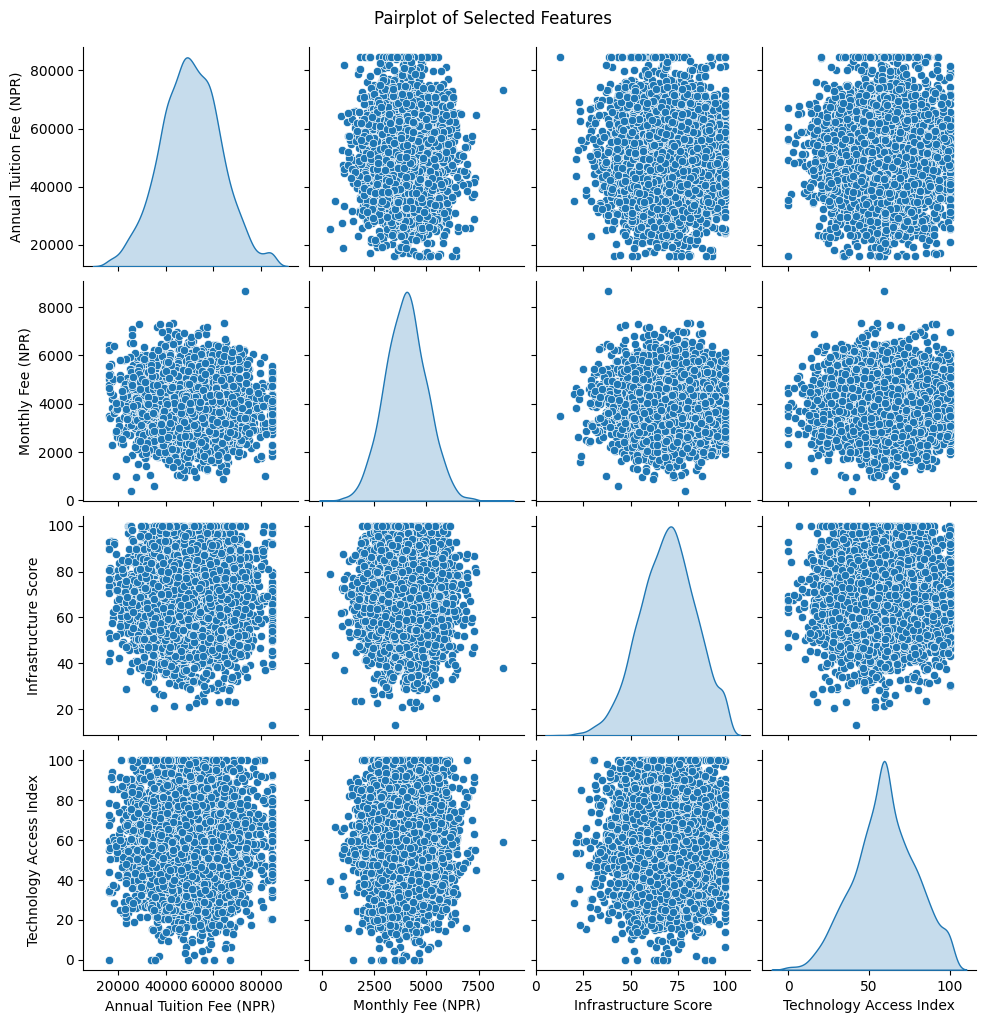

In [26]:
sns.pairplot(df[['Annual Tuition Fee (NPR)', 'Monthly Fee (NPR)',
                 'Infrastructure Score', 'Technology Access Index']].dropna(), diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

6. Bar Plot of Fee Increase % by Scholarship Level
Purpose: To analyze the relationship between scholarship levels and fee hikes.


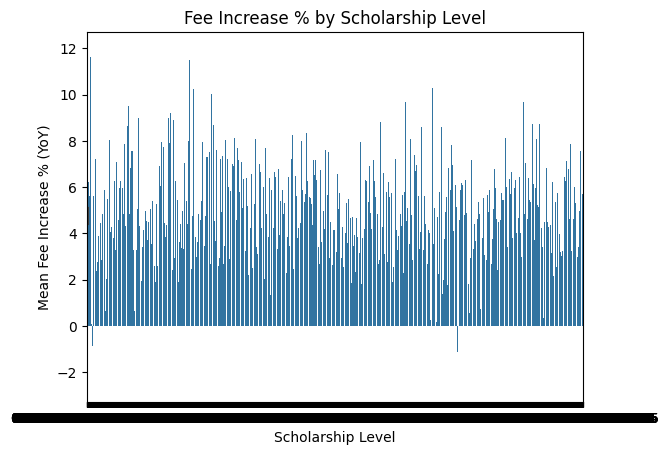

In [27]:
import numpy as np
sns.barplot(x='Scholarship % Availability', y='Fee Increase % (YoY)', data=df, estimator=np.mean)
plt.title('Fee Increase % by Scholarship Level')
plt.xlabel('Scholarship Level')
plt.ylabel('Mean Fee Increase % (YoY)')
plt.show()

7. Line Plot: Tuition Fee vs Average Academic Score
Purpose: To examine if academic performance improves with increasing tuition.


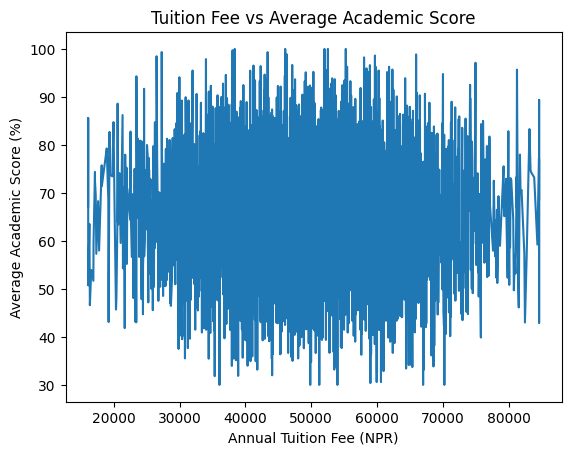

In [28]:
sorted_df = df.sort_values('Annual Tuition Fee (NPR)')
plt.plot(sorted_df['Annual Tuition Fee (NPR)'], sorted_df['Average Academic Score (%)'])
plt.title('Tuition Fee vs Average Academic Score')
plt.xlabel('Annual Tuition Fee (NPR)')
plt.ylabel('Average Academic Score (%)')
plt.show()


8. Histogram of Student-Teacher Ratio
Purpose: To assess teaching efficiency and staffing variations across schools.


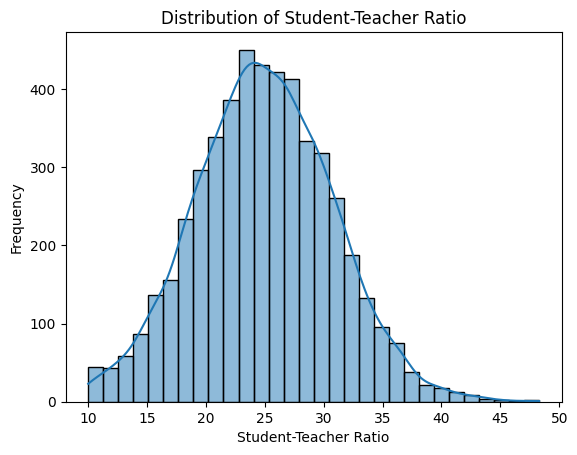

In [29]:
sns.histplot(df['Student-Teacher Ratio'], bins=30, kde=True)
plt.title('Distribution of Student-Teacher Ratio')
plt.xlabel('Student-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


9. Violin Plot for Technology Access Index
Purpose: To visualize the full distribution and density of the tech access index.


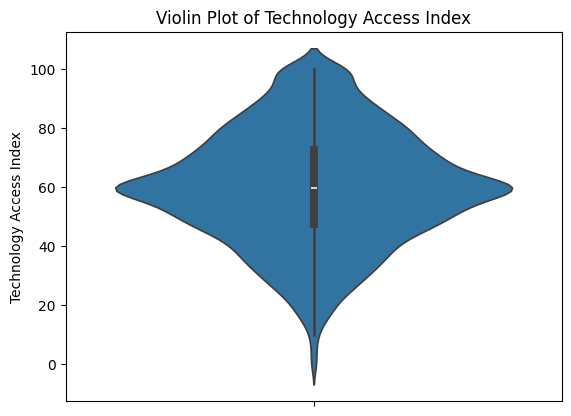

In [30]:
plt.figure()
sns.violinplot(y=df['Technology Access Index'])
plt.title('Violin Plot of Technology Access Index')
plt.ylabel('Technology Access Index')
plt.show()


10. Countplot of Enrollment Group Sizes
Purpose: To see how schools are distributed based on Number of Schools.

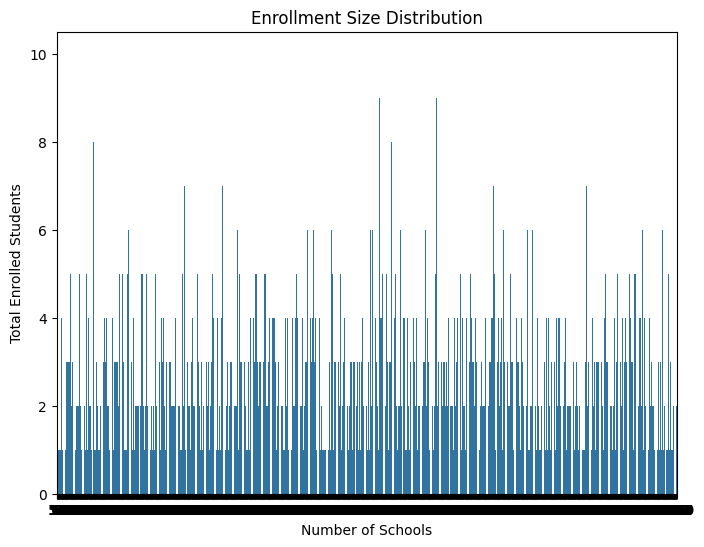

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='Total Enrolled Students', data=df)
plt.title('Enrollment Size Distribution')
plt.ylabel('Total Enrolled Students')
plt.xlabel('Number of Schools')
plt.show()

#### 4. Exploratory Data Analysis (EDA)
EDA=Exploratory data analysis is a process of examining any data set to summarize its main characteristics, often using visual methods. It helps us understand the sturcture, patterns, anomalies and relationships in the data before applying any modeling or ML.
objectives:
  - understand the distribution of variables
  - detect outliers and anomalies
  - identify patterns
  - spot missing or incorrect data
  - discover relationships between features 

#### 5. Applying Machine Learning Models

Use Case:1. Predict annual tuition fee based on infrastructure, tech, academics, etc.
Algorithm: Linear Regression (Supervised)
- Estimate a school’s tuition fee using quantitative features like infra, tech, scores.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

# 1. Load the dataset
df = pd.read_csv("cleaned_data.csv")  # Update path if needed



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Annual Tuition Fee (NPR)    5000 non-null   float64
 1   Admission Fee (NPR)         5000 non-null   float64
 2   Monthly Fee (NPR)           5000 non-null   int64  
 3   Infrastructure Score        5000 non-null   float64
 4   Student-Teacher Ratio       5000 non-null   float64
 5   Average Academic Score (%)  5000 non-null   float64
 6   Total Enrolled Students     5000 non-null   int64  
 7   Scholarship % Availability  5000 non-null   float64
 8   Technology Access Index     5000 non-null   float64
 9   Fee Increase % (YoY)        5000 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 390.8 KB
None
       Annual Tuition Fee (NPR)  Admission Fee (NPR)  Monthly Fee (NPR)  \
count               5000.000000          5000.000000        5000.000000   
me

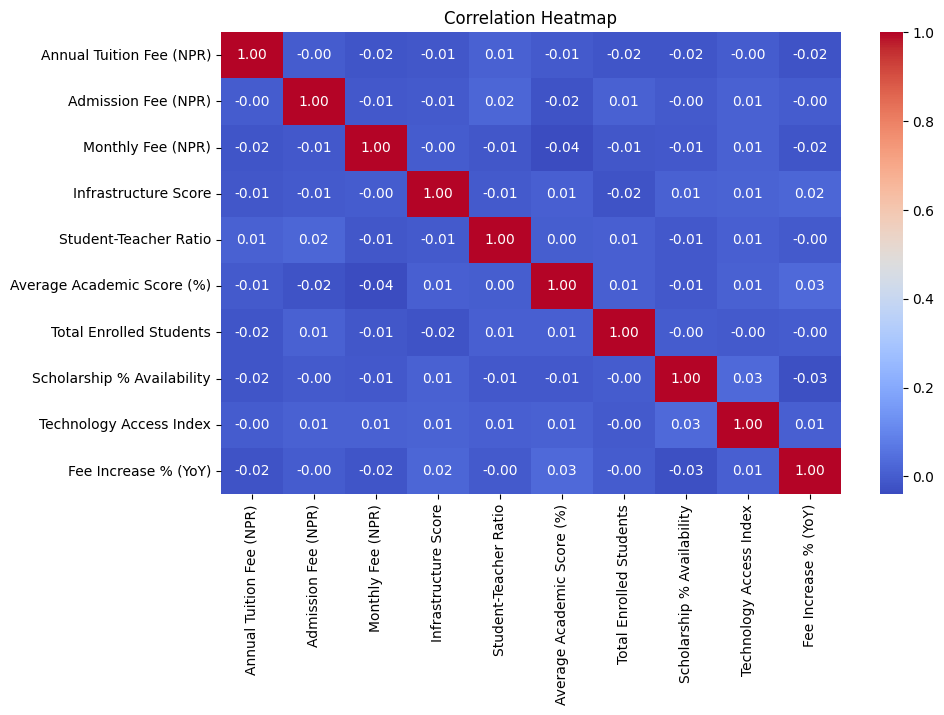

In [33]:
# 2. EDA: View structure & correlations
print(df.info())
print(df.describe())

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
# 3. Linear Regression: Predict Tuition Fee
X1 = df[['Infrastructure Score', 'Technology Access Index', 'Average Academic Score (%)']]

y1 = df['Annual Tuition Fee (NPR)']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X1_train, y1_train)
y1_pred = lr.predict(X1_test)

print("3.1 MAE:", mean_absolute_error(y1_test, y1_pred))
print("3.2 MSE:", mean_squared_error(y1_test, y1_pred))
print("3.3 RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred)))
print("3.4 Sample Prediction:", lr.predict([[75, 85, 70]])[0])


3.1 MAE: 10189.655173734462
3.2 MSE: 164950554.7622157
3.3 RMSE: 12843.307781183776
3.4 Sample Prediction: 50278.16040078633


c:\Users\A C E R\Desktop\DS\broadwayenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


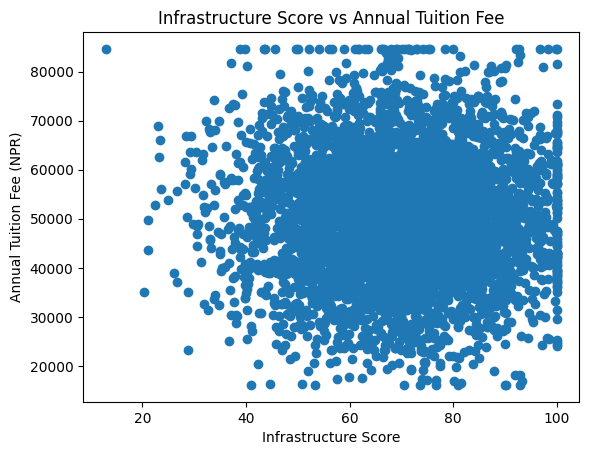

In [35]:
plt.scatter(df['Infrastructure Score'], df['Annual Tuition Fee (NPR)'])
plt.xlabel('Infrastructure Score')
plt.ylabel('Annual Tuition Fee (NPR)')
plt.title('Infrastructure Score vs Annual Tuition Fee')
plt.show()   



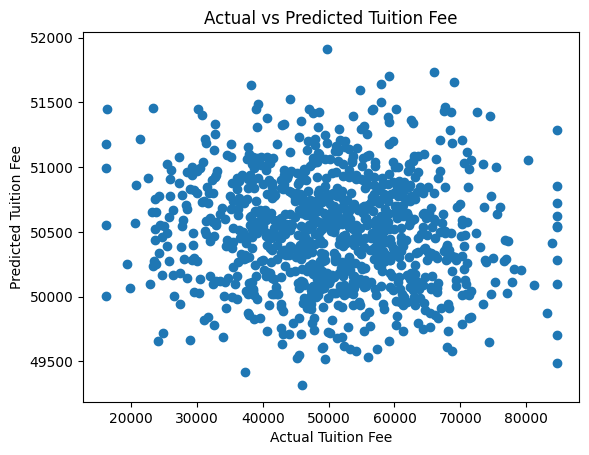

In [36]:
plt.scatter(y1_test, y1_pred)
plt.xlabel('Actual Tuition Fee')
plt.ylabel('Predicted Tuition Fee')
plt.title('Actual vs Predicted Tuition Fee')
plt.show()


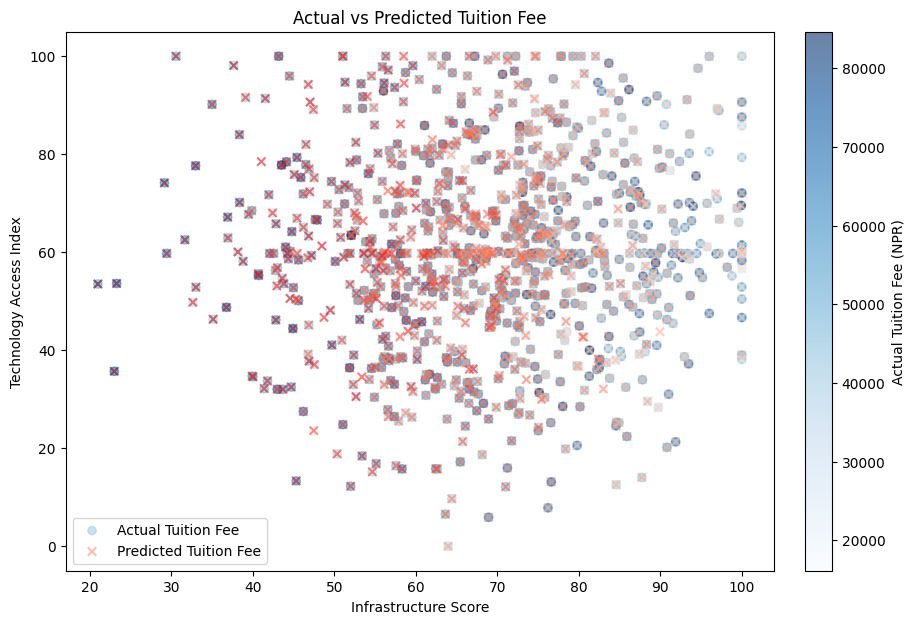

In [37]:


plt.figure(figsize=(10,7))

# Plot actual values
scatter_actual = plt.scatter(
    X1_test['Infrastructure Score'], 
    X1_test['Technology Access Index'], 
    c=y1_test, cmap='Blues', alpha=0.6, label='Actual Tuition Fee', marker='o'
)

# Plot predicted values
scatter_pred = plt.scatter(
    X1_test['Infrastructure Score'], 
    X1_test['Technology Access Index'], 
    c=y1_pred, cmap='Reds', alpha=0.6, label='Predicted Tuition Fee', marker='x'
)

plt.xlabel('Infrastructure Score')
plt.ylabel('Technology Access Index')
plt.title('Actual vs Predicted Tuition Fee')

# Add colorbars for actual and predicted (optional: show just one combined)
cbar_actual = plt.colorbar(scatter_actual, fraction=0.046, pad=0.04)
cbar_actual.set_label('Actual Tuition Fee (NPR)')

# For predicted values colorbar, create a separate axis or skip if confusing
# Here we skip adding second colorbar for simplicity

plt.legend()
plt.show()


Use Case 2 – Classify High/Low Scholarship (Logistic Regression)- Supervised
- Categorize schools into high/low scholarship based on facilities, fees, and performance.

Classification Accuracy: 0.492


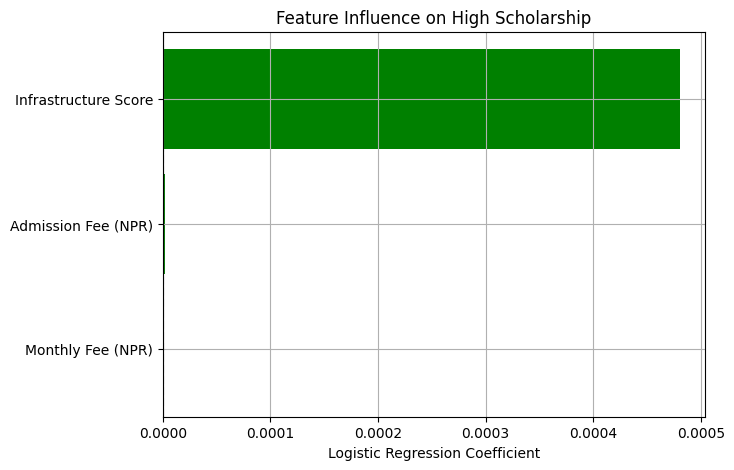

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

# Step 1: Load data
df = pd.read_csv('cleaned_data.csv')  # Replace with your CSV filename

# Step 2: Create binary target (High Scholarship = 1 if above median)
df['High Scholarship'] = (df['Scholarship % Availability'] > df['Scholarship % Availability'].median()).astype(int)

# Step 3: Select features and target
features = ['Infrastructure Score', 'Monthly Fee (NPR)', 'Admission Fee (NPR)']
X = df[features]
y = df['High Scholarship']

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Step 6: Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.3f}")

# Step : Feature Importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient')

plt.figure(figsize=(7, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='green')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Feature Influence on High Scholarship')
plt.xlabel('Logistic Regression Coefficient')
plt.grid(True)
plt.show()


Use Case 3 – Cluster schools into segments: budget, mid-tier, premium  - Unsupervised Learning
-  K-Means
- Group similar schools based on features like fee, infra, tech access, and performance.

Cluster Centers (Original Scale):
   Annual Tuition Fee (NPR)  Technology Access Index  Infrastructure Score
0              61800.121326                69.756209             68.612972
1              40813.312710                66.703310             77.219152
2              49746.883787                41.547213             61.785383


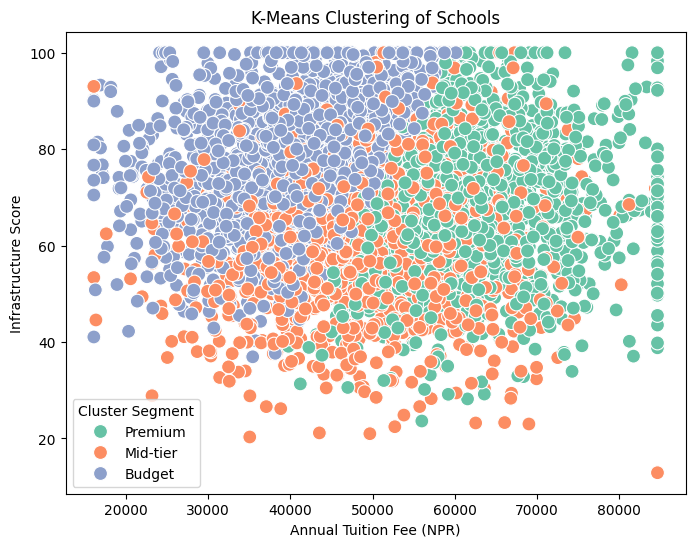

In [39]:
# 5. Clustering: Segment schools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
X3 = df[['Annual Tuition Fee (NPR)', 'Technology Access Index', 'Infrastructure Score']]

#scale features

scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters= kmeans.fit_predict(X3_scaled)
df['Cluster']=clusters

# Inverse transform cluster centers to original scale for interpretation
cluster_centers=scaler.inverse_transform(kmeans.cluster_centers_)
cluster_info=pd.DataFrame(cluster_centers, columns=X3.columns)

print('Cluster Centers (Original Scale):')
print(cluster_info)

#check the mean 'Annual Tution Fee' for each cluster to assign names
mean_fees=cluster_info['Annual Tuition Fee (NPR)']

# sort clusters by mean fee
sorted_clusters=mean_fees.sort_values().index.tolist()

# Map cluster number to name based on sorted order
cluster_name_map={
    sorted_clusters[0]: 'Budget',
    sorted_clusters[1]:'Mid-tier',
    sorted_clusters[2]:'Premium'
}

#Apply mapping to create a new column
df['Cluster Name']=df['Cluster'].map(cluster_name_map)

#plot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Tuition Fee (NPR)', y='Infrastructure Score', hue='Cluster Name', palette='Set2', s=100)
plt.title("K-Means Clustering of Schools")
plt.xlabel('Annual Tuition Fee (NPR)')
plt.ylabel('Infrastructure Score')
plt.legend(title='Cluster Segment')
plt.show()


Use Case:4 Predict if a school will have above-average academic performance.- Random Forest / XGBoost (Supervised Learning)
- Classify schools into high or low academic performers using fee, infrastructure, student-teacher ratio, technology index, etc.

In [40]:
# Use Case 4: Predict if a school has above-average academic performance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load your dataset
df = pd.read_csv('cleaned_data.csv')  # Replace with your actual CSV filename

# Create target label (High = 1, Low = 0)
df['High Academic'] = (df['Average Academic Score (%)'] > df['Average Academic Score (%)'].mean()).astype(int)

# Features and label
X = df[['Technology Access Index', 'Infrastructure Score', 'Monthly Fee (NPR)', 'Student-Teacher Ratio']]
y = df['High Academic']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {acc_rf:.2f}")


Random Forest Accuracy: 0.46


c:\Users\A C E R\Desktop\DS\broadwayenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:00:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


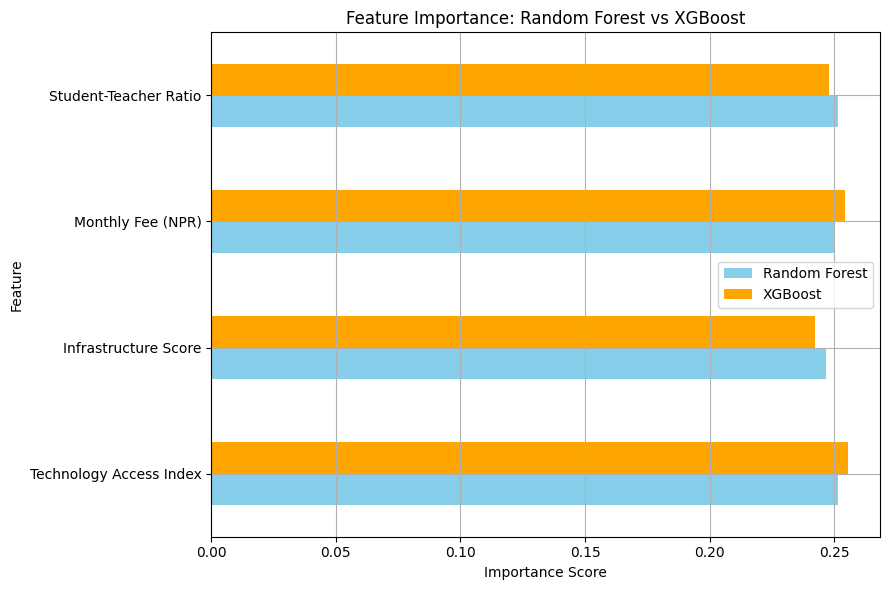

In [41]:
# Convert features to list
features = list(X.columns)

# Prepare DataFrame with feature importances
X = df[['Technology Access Index', 'Infrastructure Score', 'Monthly Fee (NPR)', 'Student-Teacher Ratio']]
y = df['High Academic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

features = list(X.columns)

importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': rf.feature_importances_,
    'XGBoost': xgb.feature_importances_
})

importance_df.set_index('Feature', inplace=True)

importance_df.plot(kind='barh', figsize=(9, 6), color=['skyblue', 'orange'])
plt.title('Feature Importance: Random Forest vs XGBoost')
plt.xlabel('Importance Score')
plt.grid(True)
plt.tight_layout()
plt.show()



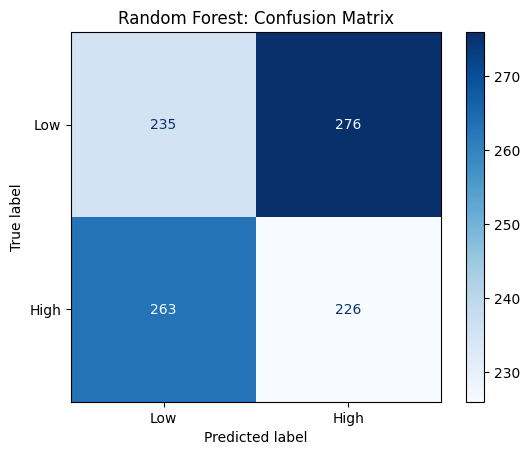

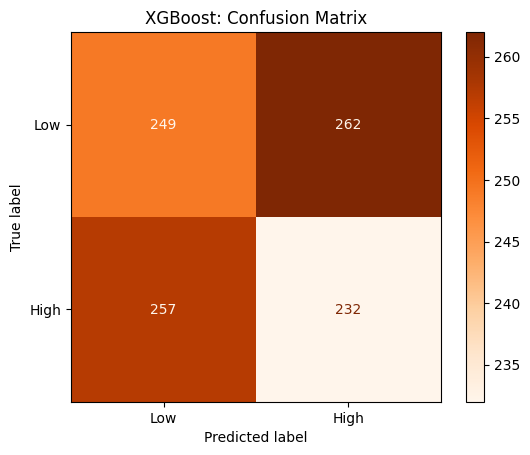

In [42]:
# Predict with Random Forest (you probably already have this)
y_pred_rf = rf.predict(X_test)

# Predict with XGBoost (you need this!)
y_pred_xgb = xgb.predict(X_test)

# After training rf and xgb models:

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Low", "High"])
disp_rf.plot(cmap='Blues')
plt.title("Random Forest: Confusion Matrix")
plt.grid(False)
plt.show()

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["Low", "High"])
disp_xgb.plot(cmap='Oranges')
plt.title("XGBoost: Confusion Matrix")
plt.grid(False)
plt.show()


Use Case:5 Detect fee increase patterns using past and current fee-related features. (Decision Tree / XGBoost) -Supervised Learning
- Analyze what factors lead to higher or lower fee hikes across school

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df['Fee Increase High'] = (df['Fee Increase % (YoY)'] > df['Fee Increase % (YoY)'].median()).astype(int)
X5 = df[['Admission Fee (NPR)', 'Technology Access Index', 'Infrastructure Score']]
y5 = df['Fee Increase High']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier()
tree_model.fit(X5_train, y5_train)
y5_pred = tree_model.predict(X5_test)

print("Fee Increase Classification Accuracy:", accuracy_score(y5_test, y5_pred))


Fee Increase Classification Accuracy: 0.49


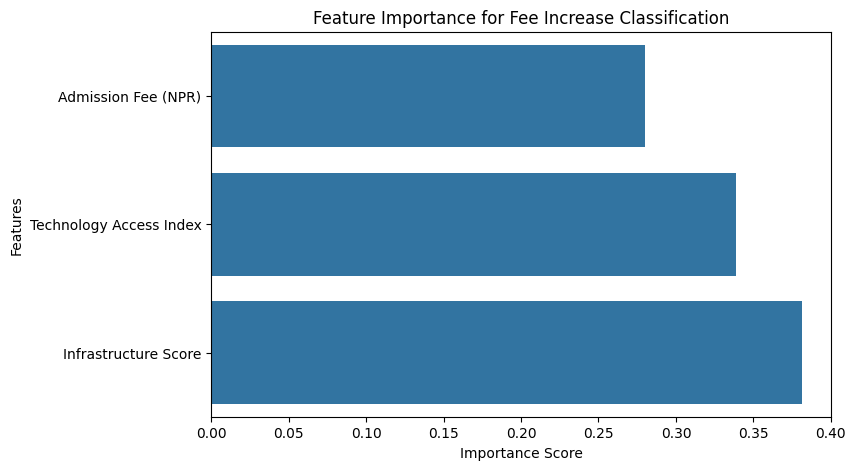

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = tree_model.feature_importances_
features = X5.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance for Fee Increase Classification')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


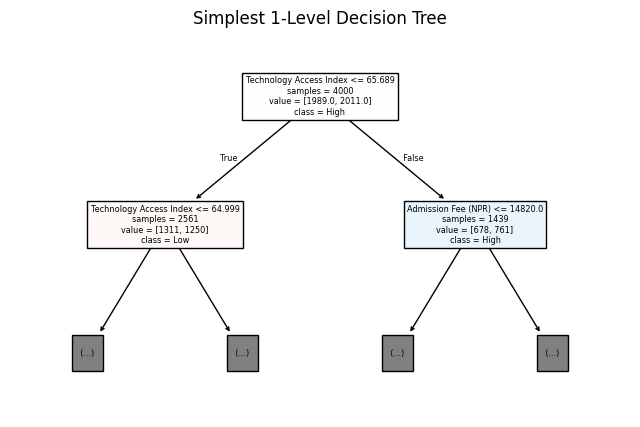

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Plot simple decision tree (only top level split)
plt.figure(figsize=(8,5))
plot_tree(
    tree_model,
    max_depth=1,
    feature_names=X5.columns,
    class_names=['Low', 'High'],
    filled=True,
    impurity=False,
    # label='root'
)
plt.title('Simplest 1-Level Decision Tree')
plt.show()

In [47]:
import joblib
joblib.dump(tree_model,"fee_model.plk")

['fee_model.plk']